In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import tkinter as tk
# from tkinter import filedialog
import os
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
import matplotlib as mpl
mpl.rc("figure", figsize=(35, 10))

In [3]:
df = pd.read_excel('/content/drive/My Drive/sample.xlsx', index_col=0)
pd.set_option("display.max_columns", None)
df.head(3)

,Week_No,Investigation_Created_Day,Investigation_Created_Date_Time,Recording_Year,Age,Gender,Nationality,Occupation,District,Municipality,City,Hospital_Name,The_Final_Diagnosis,Population,Temperature,Precipitation,Wind_Speed,Humidity,Elevation,Area_CL,Area_HC,Area_TC,Area_SV,Urban_Area,Bare_Area,Area_CBA,Area_UBA,Water_Area
Investigation_Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,Saturday,2011-12-31,2012,26.0,Male,Saudi,Soldier,An Naseem,NaN,Jeddah,Maternity and Children's Hospital,Confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Saturday,2011-12-31,2012,15.0,Male,Saudi,Student,Ghulail,Um Asalam Municipality,Jeddah,Andalusia Hai Al-Jamea Hospital,Confirmed,16867.0,29.157257,29.832464,1.0,0.012459,15.321481,0.0,1170000.0,0.0,0.0,4050000.0,180000.0,0.0,1440000.0,0.0
3,3.0,Saturday,2011-12-31,2012,24.0,Female,Saudi,Student,An Naseem,Dahaban Municipality,Jeddah,Andalusia Hai Al-Jamea Hospital,Confirmed,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,8460000.0,0.0,0.0,0.0,0.0


In [4]:
df=df[['Investigation_Created_Date_Time','District','Population', 'Temperature', 'Precipitation', 'Wind_Speed','Humidity', 'Elevation', 'The_Final_Diagnosis']]
#df1

In [5]:
df.head()

,Investigation_Created_Date_Time,District,Population,Temperature,Precipitation,Wind_Speed,Humidity,Elevation,The_Final_Diagnosis
Investigation_Id,,,,,,,,,
1,2011-12-31,An Naseem,NaN,NaN,NaN,NaN,NaN,NaN,Confirmed
2,2011-12-31,Ghulail,16867.0,29.157257,29.832464,1.0,0.012459,15.321481,Confirmed
3,2011-12-31,An Naseem,0.0,0.000000,0.000000,0.0,0.000000,0.000000,Confirmed
4,2011-12-31,Al Adel,0.0,0.000000,0.000000,0.0,0.000000,3.353018,Confirmed
5,2011-12-31,Quwaizah,NaN,NaN,NaN,NaN,NaN,NaN,Confirmed


In [6]:
nan_feature=[feature for feature in df.columns if df[feature].isnull().sum()>1]
nan_feature

['District',
 'Population',
 'Temperature',
 'Precipitation',
 'Wind_Speed',
 'Humidity',
 'Elevation']

In [7]:
num_feature=[feature for feature in df.columns if df[feature].dtypes != 'O']
num_feature = num_feature[1:]
num_feature

['Population',
 'Temperature',
 'Precipitation',
 'Wind_Speed',
 'Humidity',
 'Elevation']

In [8]:
for feature in num_feature:
    mean = df[feature].mean()
    df[feature].replace(np.nan, mean, inplace = True)

In [9]:
df['District'].replace(np.nan, 'UNKNOWN', inplace = True)

In [10]:
df.shape

(1115, 9)

In [11]:
nan_feature=[feature for feature in df.columns if df[feature].isnull().sum()>1]
nan_feature

[]

In [12]:
df['dengu_stat'] = df.groupby(['Investigation_Created_Date_Time', 'District'])['The_Final_Diagnosis'].transform('count')

In [13]:
df.head()

,Investigation_Created_Date_Time,District,Population,Temperature,Precipitation,Wind_Speed,Humidity,Elevation,The_Final_Diagnosis,dengu_stat
Investigation_Id,,,,,,,,,,
1,2011-12-31,An Naseem,33297.624161,26.335262,42.461380,4.104621,0.012999,25.575908,Confirmed,2.0
2,2011-12-31,Ghulail,16867.000000,29.157257,29.832464,1.000000,0.012459,15.321481,Confirmed,1.0
3,2011-12-31,An Naseem,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Confirmed,2.0
4,2011-12-31,Al Adel,0.000000,0.000000,0.000000,0.000000,0.000000,3.353018,Confirmed,1.0
5,2011-12-31,Quwaizah,33297.624161,26.335262,42.461380,4.104621,0.012999,25.575908,Confirmed,2.0


In [14]:
df=df.drop_duplicates(['Investigation_Created_Date_Time','District'],keep= 'last')

In [15]:
df.shape

(750, 10)

In [16]:
df.describe()

,Population,Temperature,Precipitation,Wind_Speed,Humidity,Elevation,dengu_stat
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,749.000000
mean,32010.367230,26.447600,41.104572,4.158513,0.013014,25.787159,1.487316
std,38583.672814,7.605824,24.345600,1.574041,0.003859,20.591940,1.167250
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2559.000000,26.335262,27.422695,4.104621,0.012999,12.079623,1.000000
50%,30734.000000,29.436676,42.461380,5.001506,0.013038,25.575908,1.000000
75%,33297.624161,29.800690,42.461380,5.102507,0.015445,25.575908,1.000000
max,226143.000000,30.126726,111.139193,5.642914,0.016370,157.970170,12.000000


In [17]:
#create new column of month and year from the 'Investigation_Created_Date_Time'
df['month'] = pd.DatetimeIndex(df['Investigation_Created_Date_Time']).month
df['year'] = pd.DatetimeIndex(df['Investigation_Created_Date_Time']).year

In [50]:
df1 = df.copy()
df1['day'] = pd.DatetimeIndex(df1['Investigation_Created_Date_Time']).day

In [51]:
df1.head()

,Investigation_Created_Date_Time,District,Population,Temperature,Precipitation,Wind_Speed,Humidity,Elevation,The_Final_Diagnosis,dengu_stat,month,year,day
Investigation_Id,,,,,,,,,,,,,
2,2011-12-31,Ghulail,16867.0,29.157257,29.832464,1.000000,0.012459,15.321481,Confirmed,1.0,12.0,2011.0,31.0
3,2011-12-31,An Naseem,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,Confirmed,2.0,12.0,2011.0,31.0
4,2011-12-31,Al Adel,0.0,0.000000,0.000000,0.000000,0.000000,3.353018,Confirmed,1.0,12.0,2011.0,31.0
6,2011-12-31,Al Jami`ah,2692.0,29.007965,29.832464,1.000000,0.015038,18.407518,Confirmed,1.0,12.0,2011.0,31.0
8,2011-12-31,Quwaizah,25166.0,29.406555,48.449595,5.430207,0.011739,61.944054,Suspected,2.0,12.0,2011.0,31.0


In [18]:
df.head()

,Investigation_Created_Date_Time,District,Population,Temperature,Precipitation,Wind_Speed,Humidity,Elevation,The_Final_Diagnosis,dengu_stat,month,year
Investigation_Id,,,,,,,,,,,,
2,2011-12-31,Ghulail,16867.0,29.157257,29.832464,1.000000,0.012459,15.321481,Confirmed,1.0,12.0,2011.0
3,2011-12-31,An Naseem,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,Confirmed,2.0,12.0,2011.0
4,2011-12-31,Al Adel,0.0,0.000000,0.000000,0.000000,0.000000,3.353018,Confirmed,1.0,12.0,2011.0
6,2011-12-31,Al Jami`ah,2692.0,29.007965,29.832464,1.000000,0.015038,18.407518,Confirmed,1.0,12.0,2011.0
8,2011-12-31,Quwaizah,25166.0,29.406555,48.449595,5.430207,0.011739,61.944054,Suspected,2.0,12.0,2011.0


In [ ]:
#create a new dataframe who are 'Confirmed' cases of dengu
new_df = df.loc[df.The_Final_Diagnosis=='Confirmed']
new_df_month = new_df

In [ ]:
new_df.shape

(503, 12)

In [ ]:
#Year and district ID wise total number of confirmed cases 
new_df['total_dengu_stat'] = new_df.groupby(['year', 'District'])['dengu_stat'].transform('count')
#month and district ID wise total number of confirmed cases 
new_df_month['total_dengu_stat'] = new_df_month.groupby(['month', 'year', 'District'])['dengu_stat'].transform('count')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
new_df.head(10)

,Investigation_Created_Date_Time,District,Population,Temperature,Precipitation,Wind_Speed,Humidity,Elevation,The_Final_Diagnosis,dengu_stat,month,year,total_dengu_stat
Investigation_Id,,,,,,,,,,,,,
2,2011-12-31,Ghulail,16867.000000,29.157257,29.832464,1.000000,0.012459,15.321481,Confirmed,1.0,12.0,2011.0,1
3,2011-12-31,An Naseem,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Confirmed,2.0,12.0,2011.0,1
4,2011-12-31,Al Adel,0.000000,0.000000,0.000000,0.000000,0.000000,3.353018,Confirmed,1.0,12.0,2011.0,1
6,2011-12-31,Al Jami`ah,2692.000000,29.007965,29.832464,1.000000,0.015038,18.407518,Confirmed,1.0,12.0,2011.0,1
9,2011-12-31,National Guard Housing,1751.000000,29.282410,31.955008,5.219314,0.014393,6.138924,Confirmed,2.0,12.0,2011.0,1
12,2012-01-02,Al-Ruwais,37836.000000,29.362274,33.665652,1.000000,0.014797,88.899292,Confirmed,1.0,1.0,2012.0,1
13,2012-01-02,Makkah,52311.000000,29.045288,31.734004,1.000000,0.014393,28.013210,Confirmed,1.0,1.0,2012.0,8
16,2012-01-02,UNKNOWN,33297.624161,26.335262,42.461380,4.104621,0.012999,25.575908,Confirmed,1.0,1.0,2012.0,7
18,2012-01-02,Al Nakheel,27092.000000,29.406555,43.176134,5.352886,0.011739,20.823179,Confirmed,1.0,1.0,2012.0,1


In [ ]:
new_df['total_dengu_stat'].describe()

count    503.000000
mean       3.974155
std        3.335390
min        1.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       15.000000
Name: total_dengu_stat, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


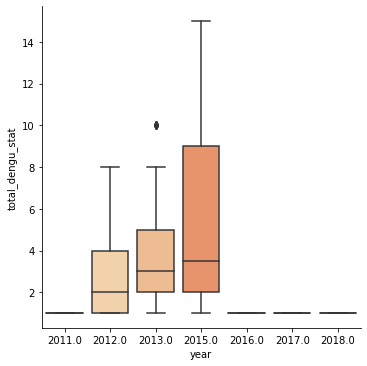

In [ ]:
#box plot for year wise total dengu confirmed cases
mpl.rc("figure", figsize=(45, 10))
sns.catplot("year", "total_dengu_stat", data=new_df, kind="box", palette="OrRd", height=5);

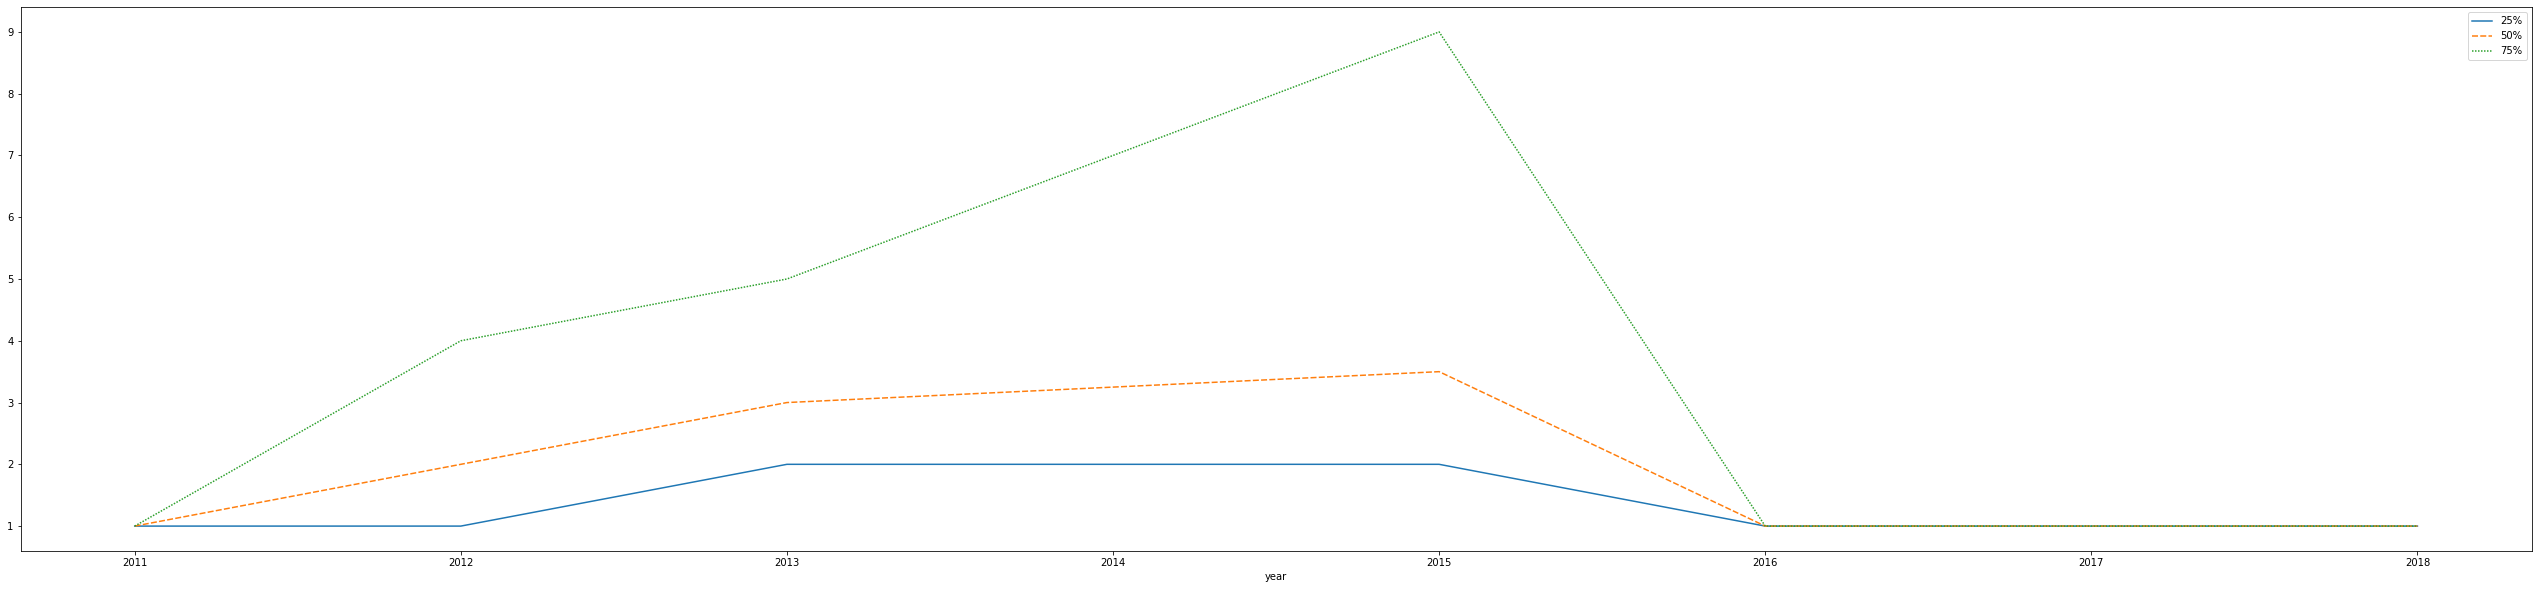

In [ ]:
#Visualize '25%', '50%', '75%' percentile of total confirmed dengu cases
df_p=new_df.groupby(['year']).describe()
sns.lineplot(data=df_p['total_dengu_stat'][['25%', '50%', '75%']])


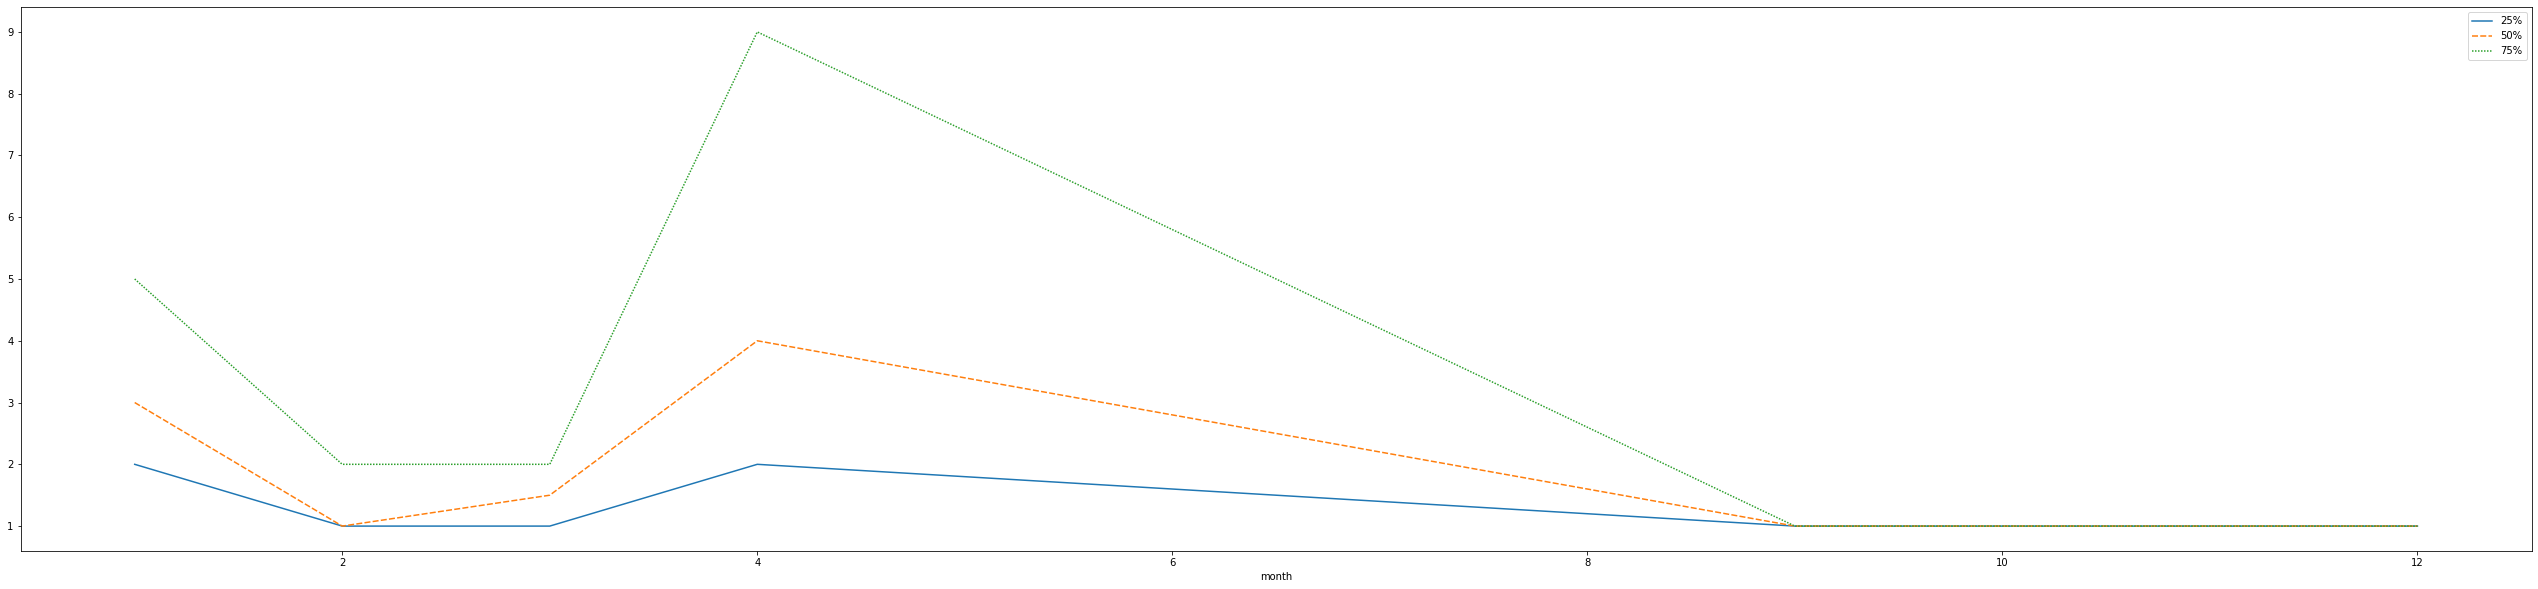

In [ ]:
#Visualize '25%', '50%', '75%' percentile of total confirmed dengu cases
df_p=new_df.groupby(['month']).describe()
#daily_df = new_df.resample('D').describe()

df_p
sns.lineplot(data=df_p['total_dengu_stat'][['25%', '50%', '75%']])

In [ ]:
#create a dataframe only with the independend dataframe
df_proc=new_df[['Investigation_Created_Date_Time','total_dengu_stat','Population','Temperature','Precipitation','Wind_Speed','Humidity','Elevation','dengu_stat']]

In [ ]:
df_proc

,Investigation_Created_Date_Time,total_dengu_stat,Population,Temperature,Precipitation,Wind_Speed,Humidity,Elevation,dengu_stat
Investigation_Id,,,,,,,,,
2,2011-12-31,1,16867.000000,29.157257,29.832464,1.000000,0.012459,15.321481,1.0
3,2011-12-31,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
4,2011-12-31,1,0.000000,0.000000,0.000000,0.000000,0.000000,3.353018,1.0
6,2011-12-31,1,2692.000000,29.007965,29.832464,1.000000,0.015038,18.407518,1.0
9,2011-12-31,1,1751.000000,29.282410,31.955008,5.219314,0.014393,6.138924,2.0
...,...,...,...,...,...,...,...,...,...
1111,2015-04-26,10,36000.000000,29.736755,73.091373,5.086421,0.015112,22.265804,2.0
1112,2015-04-26,9,33297.624161,26.335262,42.461380,4.104621,0.012999,25.575908,2.0
1113,2017-09-26,1,83922.000000,29.754211,107.384174,5.137621,0.015566,36.390258,1.0


In [ ]:
#slice the columns to build the model
#Convert "Investigation_Created_Date_Time" to datetime
df_proc['Investigation_Created_Date_Time'] = pd.to_datetime(df_proc['Investigation_Created_Date_Time'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Separate dates for future plotting
train_dates = pd.to_datetime(df_proc['Investigation_Created_Date_Time'])

In [ ]:
df_proc.describe()

,total_dengu_stat,Population,Temperature,Precipitation,Wind_Speed,Humidity,Elevation,dengu_stat
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,3.974155,33383.606602,26.663779,45.564525,4.237475,0.013094,25.874137,1.489066
std,3.335390,41264.838433,7.348833,27.172406,1.530309,0.003728,20.403980,1.167018
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,2691.000000,26.335262,29.333586,4.104621,0.012999,12.032665,1.000000
50%,3.000000,25920.000000,29.550385,42.461380,5.014783,0.013100,25.575908,1.000000
75%,6.000000,33297.624161,29.800690,44.865500,5.121038,0.015230,25.575908,1.500000
max,15.000000,226143.000000,30.126726,111.139193,5.642914,0.016370,157.970170,12.000000


In [ ]:
#Variables for training
cols = list(df_proc)[1:]
#cols

In [ ]:
cols

['total_dengu_stat',
 'Population',
 'Temperature',
 'Precipitation',
 'Wind_Speed',
 'Humidity',
 'Elevation',
 'dengu_stat']

In [ ]:
training = df_proc[new_df['year'].isin(['2012','2015'])]
test = df_proc[~new_df['year'].isin(['2012','2015'])]


In [ ]:
df_for_test = test[cols].astype(float)
df_for_training = training[cols].astype(float)

In [ ]:
df_for_training.shape,df_for_test.shape

((330, 8), (173, 8))

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [ ]:
trainX = []
trainY = []

n_future = 1   # Number of days we want to predict into the future
n_past = 6     # Number of past days we want to use to predict the future
#for i in range(n_past, len(df_for_training_scaled) - n_future +1):
for i in range(n_past, len(training) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


trainX shape == (324, 6, 8).
trainY shape == (324, 1).


In [ ]:
trainX[2]

array([[ 0.77302856, -0.04423397, -0.0108768 , -0.28841264, -0.08025992,
         0.00161805, -0.04423591, -0.40581842],
       [-0.8449382 , -0.18190387,  0.37972166, -0.26492051,  0.69231302,
        -0.31478665, -0.27429971, -0.40581842],
       [-0.57527707, -0.59817755,  0.36393324, -0.6041886 ,  0.67537449,
         0.35186815,  0.20464718, -0.40581842],
       [-0.8449382 , -0.04423397, -0.0108768 , -0.28841264, -0.08025992,
         0.00161805, -0.04423591, -0.40581842],
       [ 1.04268969, -0.59817755,  0.36393324, -0.6041886 ,  0.67537449,
         0.35186815,  0.20464718, -0.40581842],
       [ 0.23370631, -0.78026956,  0.34801663, -0.39896741,  0.59869555,
        -0.13393079, -0.74601194, -0.40581842]])

In [ ]:
trainY

array([[ 1.04268969],
       [ 0.23370631],
       [-0.8449382 ],
       [-0.30561594],
       [-0.03595482],
       [-0.8449382 ],
       [ 1.04268969],
       [-0.8449382 ],
       [ 0.23370631],
       [-0.8449382 ],
       [-0.57527707],
       [-0.57527707],
       [-0.8449382 ],
       [-0.03595482],
       [-0.03595482],
       [-0.8449382 ],
       [-0.8449382 ],
       [-0.8449382 ],
       [-0.57527707],
       [-0.8449382 ],
       [-0.8449382 ],
       [-0.57527707],
       [-0.8449382 ],
       [ 1.04268969],
       [-0.30561594],
       [ 0.23370631],
       [-0.03595482],
       [-0.8449382 ],
       [-0.30561594],
       [-0.57527707],
       [-0.57527707],
       [-0.57527707],
       [ 1.04268969],
       [-0.30561594],
       [-0.57527707],
       [-0.57527707],
       [ 0.77302856],
       [-0.8449382 ],
       [-0.30561594],
       [ 1.04268969],
       [-0.8449382 ],
       [-0.30561594],
       [-0.03595482],
       [-0.57527707],
       [-0.57527707],
       [-0

In [ ]:
df_for_training_scaled[2:9]

array([[ 7.73028562e-01, -4.42339742e-02, -1.08767953e-02,
        -2.88412638e-01, -8.02599176e-02,  1.61804855e-03,
        -4.42359111e-02, -4.05818423e-01],
       [-8.44938196e-01, -1.81903874e-01,  3.79721656e-01,
        -2.64920515e-01,  6.92313023e-01, -3.14786649e-01,
        -2.74299712e-01, -4.05818423e-01],
       [-5.75277069e-01, -5.98177552e-01,  3.63933241e-01,
        -6.04188603e-01,  6.75374487e-01,  3.51868146e-01,
         2.04647179e-01, -4.05818423e-01],
       [-8.44938196e-01, -4.42339742e-02, -1.08767953e-02,
        -2.88412638e-01, -8.02599176e-02,  1.61804855e-03,
        -4.42359111e-02, -4.05818423e-01],
       [ 1.04268969e+00, -5.98177552e-01,  3.63933241e-01,
        -6.04188603e-01,  6.75374487e-01,  3.51868146e-01,
         2.04647179e-01, -4.05818423e-01],
       [ 2.33706309e-01, -7.80269555e-01,  3.48016632e-01,
        -3.98967406e-01,  5.98695551e-01, -1.33930789e-01,
        -7.46011937e-01, -4.05818423e-01],
       [-8.44938196e-01,  3.775720

In [ ]:


model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse',metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 6, 64)             18688     
_________________________________________________________________
dropout_8 (Dropout)          (None, 6, 64)             0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 6, 128)            98816     
_________________________________________________________________
dropout_9 (Dropout)          (None, 6, 128)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 6, 256)            394240    
_________________________________________________________________
dropout_10 (Dropout)         (None, 6, 256)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)               

In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="mae", 
                                        mode ="min", patience = 10, 
                                        restore_best_weights = True)
# fit model
#history = model.fit(trainX, trainY, epochs=50, batch_size=64, validation_split=0.3, verbose=1, callbacks =[earlystopping])
history = model.fit(trainX, trainY, epochs=500, batch_size=64, validation_split=0.3, verbose=1)

Epoch 1/500
4/4 [==============================] - 7s 575ms/step - loss: 0.8287 - acc: 0.0000e+00 - val_loss: 1.4750 - val_acc: 0.0000e+00
Epoch 2/500
4/4 [==============================] - 0s 51ms/step - loss: 0.7766 - acc: 0.0000e+00 - val_loss: 1.5117 - val_acc: 0.0000e+00
Epoch 3/500
4/4 [==============================] - 0s 53ms/step - loss: 0.7425 - acc: 0.0000e+00 - val_loss: 1.5579 - val_acc: 0.0000e+00
Epoch 4/500
4/4 [==============================] - 0s 48ms/step - loss: 0.7513 - acc: 0.0000e+00 - val_loss: 1.5460 - val_acc: 0.0000e+00
Epoch 5/500
4/4 [==============================] - 0s 52ms/step - loss: 0.7054 - acc: 0.0000e+00 - val_loss: 1.4655 - val_acc: 0.0000e+00
Epoch 6/500
4/4 [==============================] - 0s 55ms/step - loss: 0.6381 - acc: 0.0000e+00 - val_loss: 1.3886 - val_acc: 0.0000e+00
Epoch 7/500
4/4 [==============================] - 0s 49ms/step - loss: 0.6078 - acc: 0.0000e+00 - val_loss: 1.3210 - val_acc: 0.0000e+00
Epoch 8/500
4/4 [================

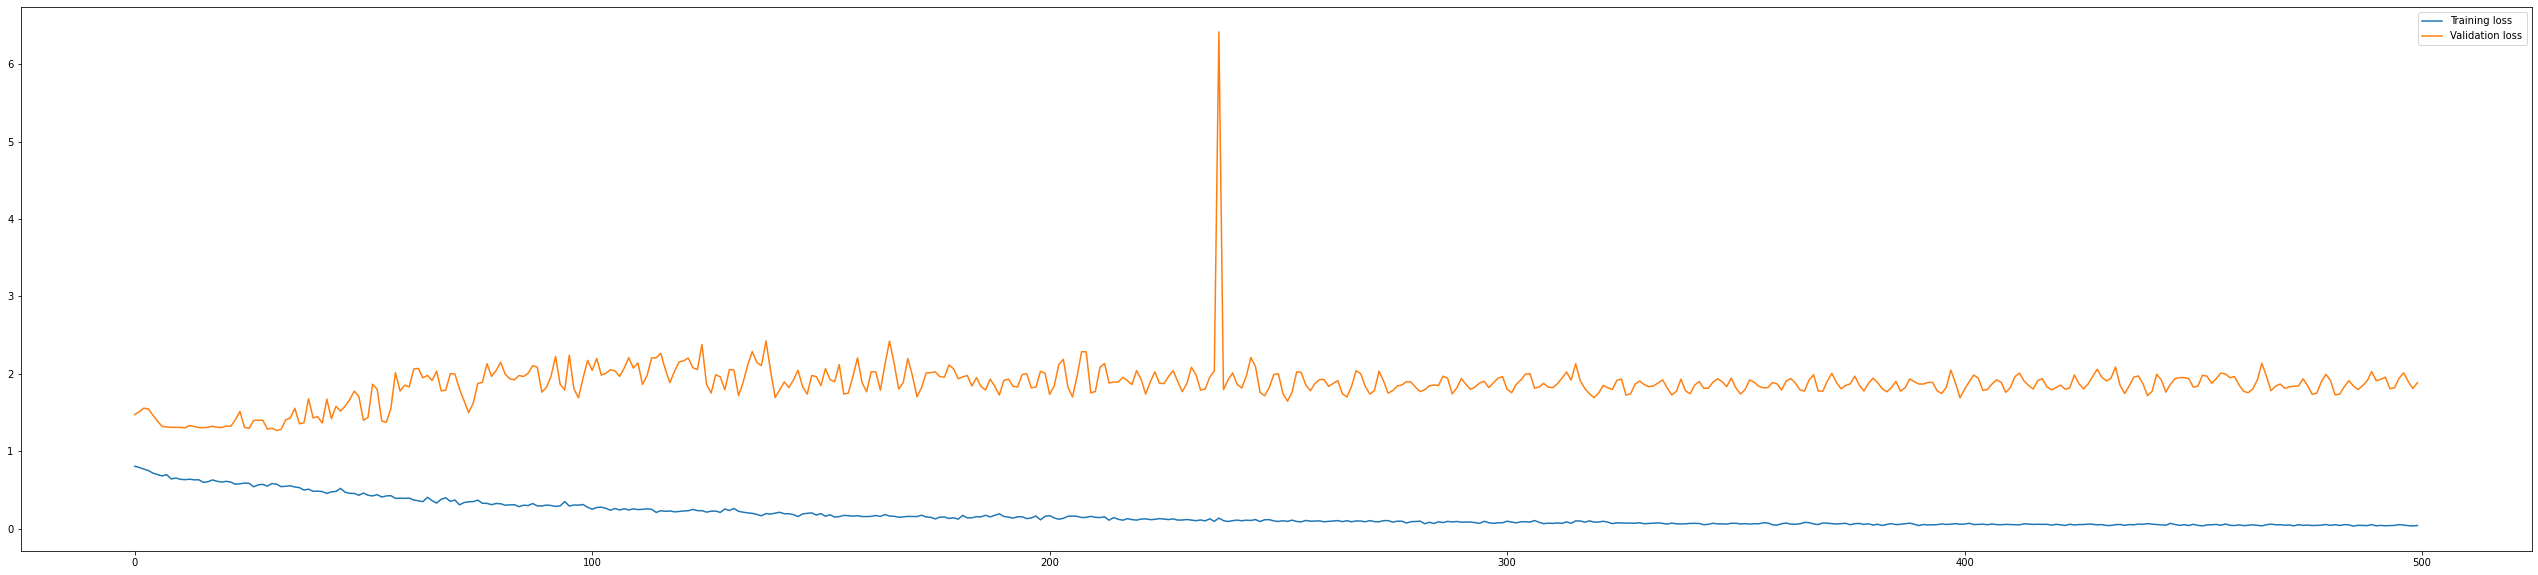

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
#Forecasting...
#Start with the last day in training date and predict future...
n_future=30  #Redefining n_future to extend prediction dates beyond original n_future dates...
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()

forecast = model.predict(trainX[-n_future:]) #forecast 
#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
forecast_copies = np.repeat(forecast, df_for_test.shape[1], axis=-1)
#y_pred_future = scaler.inverse_transform(forecast_copies)[:,5]
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]
#y_pred_future
# Convert timestamp to date
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())
df_forecast = pd.DataFrame({'Investigation_Created_Date_Time':np.array(forecast_dates), 'dengu_stat':y_pred_future})
df_forecast['Investigation_Created_Date_Time']=pd.to_datetime(df_forecast['Investigation_Created_Date_Time'])

In [ ]:
df_forecast

,Investigation_Created_Date_Time,dengu_stat
0,2018-04-26,9.655329
1,2018-04-27,10.973275
2,2018-04-28,8.484054
3,2018-04-29,10.027007
4,2018-04-30,2.608211
5,2018-05-01,12.650071
6,2018-05-02,4.888519
7,2018-05-03,6.903118
8,2018-05-04,10.247815
9,2018-05-05,5.706872


In [ ]:
original = new_df[['Investigation_Created_Date_Time','total_dengu_stat']]
original['Investigation_Created_Date_Time'] = pd.to_datetime(original['Investigation_Created_Date_Time'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


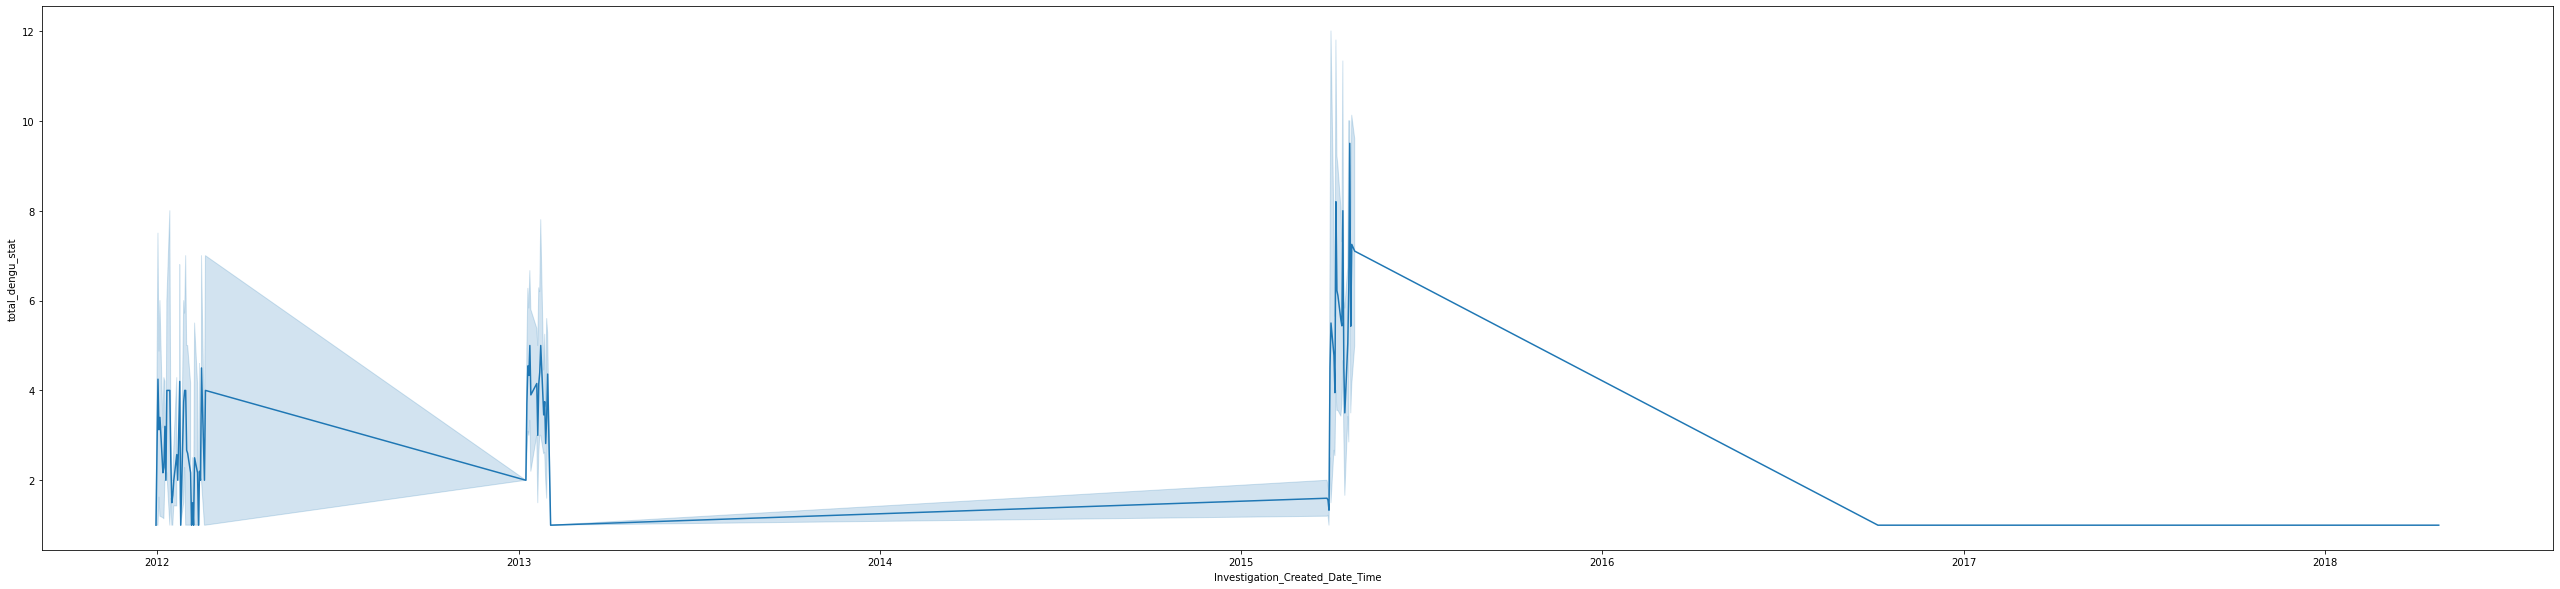

In [ ]:
sns.lineplot(original['Investigation_Created_Date_Time'], original['total_dengu_stat'])
#sns.lineplot(df_forecast['Investigation_Created_Date_Time'], df_forecast['Investigation_Created_Date_Time'])

## **ARIMA**

In [101]:
df.head()

,Investigation_Created_Date_Time,District,Population,Temperature,Precipitation,Wind_Speed,Humidity,Elevation,The_Final_Diagnosis,dengu_stat,month,year
Investigation_Id,,,,,,,,,,,,
2,2011-12-31,Ghulail,16867.0,29.157257,29.832464,1.000000,0.012459,15.321481,Confirmed,1.0,12.0,2011.0
3,2011-12-31,An Naseem,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,Confirmed,2.0,12.0,2011.0
4,2011-12-31,Al Adel,0.0,0.000000,0.000000,0.000000,0.000000,3.353018,Confirmed,1.0,12.0,2011.0
6,2011-12-31,Al Jami`ah,2692.0,29.007965,29.832464,1.000000,0.015038,18.407518,Confirmed,1.0,12.0,2011.0
8,2011-12-31,Quwaizah,25166.0,29.406555,48.449595,5.430207,0.011739,61.944054,Suspected,2.0,12.0,2011.0


In [107]:
temp = df1.groupby(['year','month','day'])['The_Final_Diagnosis'].count()

In [108]:
tmp=pd.DataFrame(temp)

In [109]:
tmp.index

MultiIndex([(2011.0, 12.0, 31.0),
            (2012.0,  1.0,  1.0),
            (2012.0,  1.0,  2.0),
            (2012.0,  1.0,  3.0),
            (2012.0,  1.0,  4.0),
            (2012.0,  1.0,  7.0),
            (2012.0,  1.0,  8.0),
            (2012.0,  1.0,  9.0),
            (2012.0,  1.0, 10.0),
            (2012.0,  1.0, 11.0),
            ...
            (2015.0,  4.0, 16.0),
            (2015.0,  4.0, 19.0),
            (2015.0,  4.0, 20.0),
            (2015.0,  4.0, 21.0),
            (2015.0,  4.0, 22.0),
            (2015.0,  4.0, 23.0),
            (2015.0,  4.0, 26.0),
            (2016.0, 10.0,  6.0),
            (2017.0,  9.0, 26.0),
            (2018.0,  4.0, 26.0)],
           names=['year', 'month', 'day'], length=107)

In [110]:
tmp = tmp.add_suffix('_count').reset_index()

In [111]:
tmp

,year,month,day,The_Final_Diagnosis_count
0,2011.0,12.0,31.0,6
1,2012.0,1.0,1.0,2
2,2012.0,1.0,2.0,7
3,2012.0,1.0,3.0,10
4,2012.0,1.0,4.0,7
...,...,...,...,...
102,2015.0,4.0,23.0,8
103,2015.0,4.0,26.0,10
104,2016.0,10.0,6.0,1
105,2017.0,9.0,26.0,1


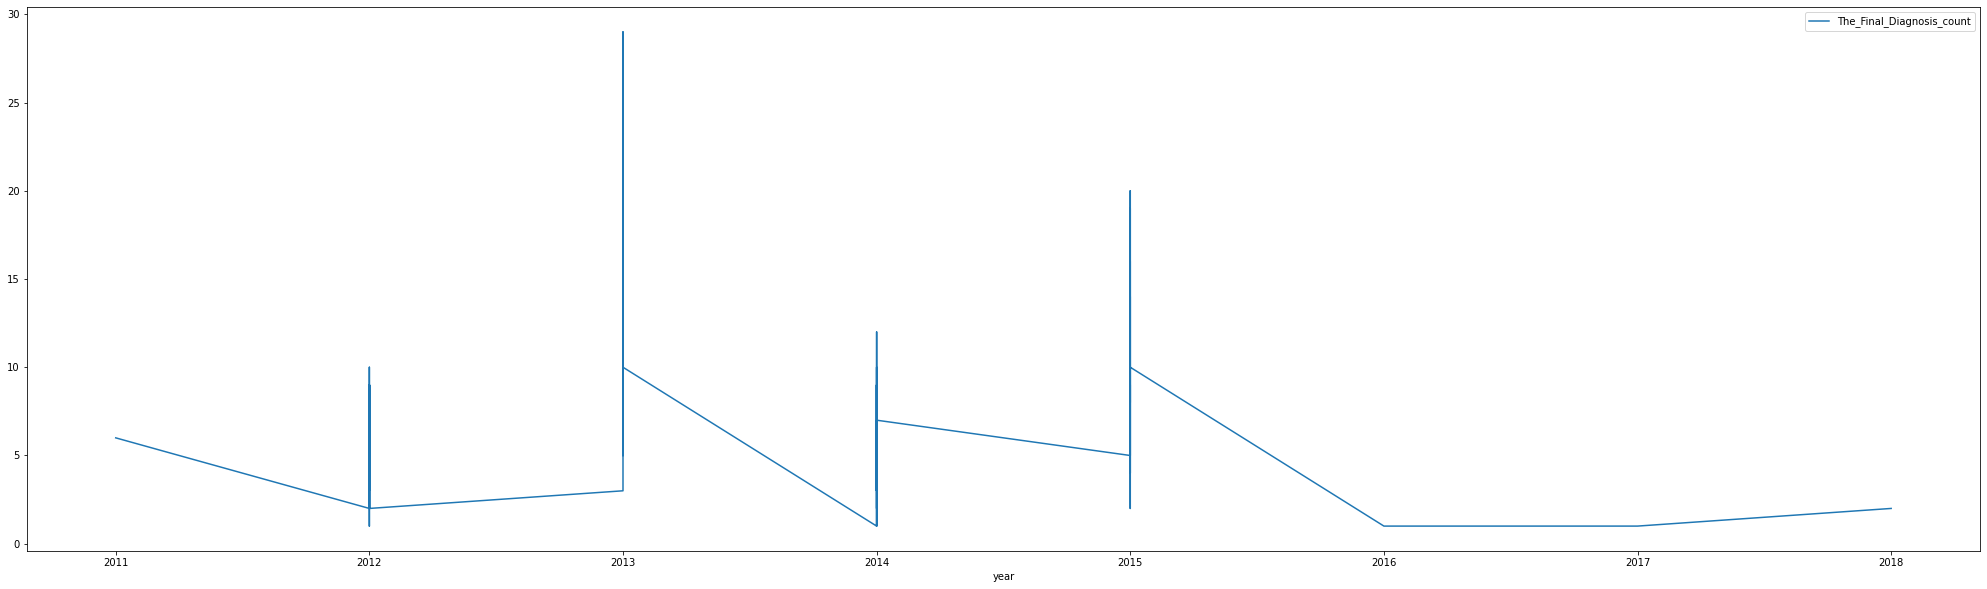

In [112]:
tmp.plot(x = 'year', y= 'The_Final_Diagnosis_count', kind='line')

In [113]:
from statsmodels.tsa.stattools import adfuller

In [114]:
tmp['The_Final_Diagnosis_count'].dtypes

dtype('int64')

In [115]:
test_result=adfuller(tmp['The_Final_Diagnosis_count'])

In [116]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [117]:
adfuller_test(tmp['The_Final_Diagnosis_count'])

ADF Test Statistic : -2.513304209267996
p-value : 0.11227073352764622
#Lags Used : 4
Number of Observations Used : 102
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [118]:
import statsmodels.api as sm

In [119]:
model=sm.tsa.statespace.SARIMAX(tmp['The_Final_Diagnosis_count'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

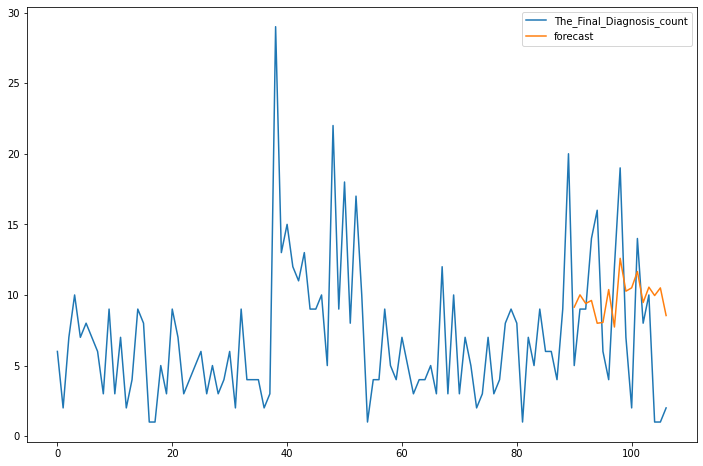

In [120]:
tmp['forecast']=results.predict(start=90,end=107,dynamic=True)
tmp[['The_Final_Diagnosis_count','forecast']].plot(figsize=(12,8))

In [121]:
from statsmodels.tsa.arima_model import ARIMA

In [122]:
model=ARIMA(tmp['The_Final_Diagnosis_count'],order=(1,1,1))
model_fit=model.fit()

In [123]:
print(model_fit.summary())

                                  ARIMA Model Results                                  
Dep. Variable:     D.The_Final_Diagnosis_count   No. Observations:                  106
Model:                          ARIMA(1, 1, 1)   Log Likelihood                -316.053
Method:                                css-mle   S.D. of innovations              4.750
Date:                         Thu, 17 Jun 2021   AIC                            640.105
Time:                                 22:06:55   BIC                            650.759
Sample:                                      1   HQIC                           644.423
                                                                                       
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.0070      0.105     -0.067      0.947      -0.212   

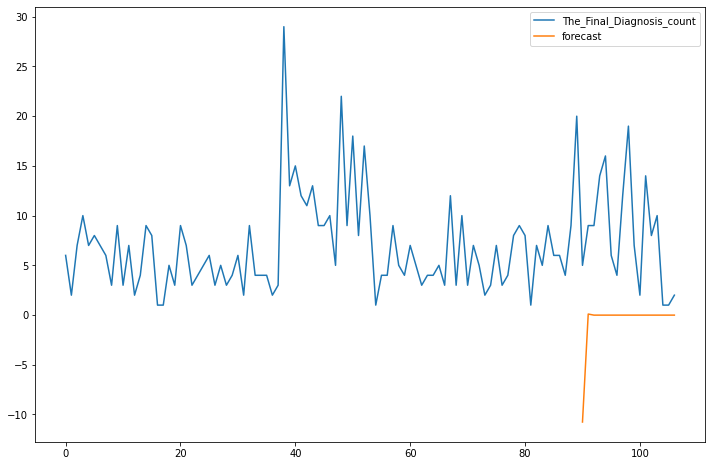

In [124]:
tmp['forecast']=model_fit.predict(start=90,end=107,dynamic=True)
tmp[['The_Final_Diagnosis_count','forecast']].plot(figsize=(12,8))

So we have done both ARIMA and SARIMAX. As it is shown as our data is seasinal so tha's why SARIMAX results will be better then ARIMA

# THE END